# Снижение размерности данных

## Что мы изучим на этом занятии

* Для чего нужно снижение размерности?
    * Проклятие размерности
    * Потребление больших вычислительных ресурсов
    * Сложность в интерпретируемости
    * Шум в данных
    * Невозможность визуализации данных
* Методы снижения размерности данных
    * Типы методов снижения размерности
    * PCA (Principal Component Analysis)

## Для чего нужно снижение размерности данных?

Данных, с которыми работают разработчики, часто бывает очень много. Не только в количестве записей (строк), но и в количестве признаков (столбцов).

Большое количество признаков, то есть большая размерность данных, - это проблема, которую приходится решать разработчикам, так как без снижения размерности данных мы столкнемся со следующими проблемами:

1. "Проклятие размерности"
2. Потребление больших вычислительных ресурсов
3. Сложность в интерпретируемости
4. Шум в данных
5. Невозможность визуализации данных

Теперь обсудим эти проблемы более подробно.

### Проклятие размерности


Проклятие размерности — это явление, с которым сталкиваются при работе с данными в многомерных пространствах, особенно когда количество признаков или переменных (размерность) растет. С увеличением размерности пространства данные становятся более разреженными, и расстояния между точками (векторами наблюдений) в этом пространстве начинают сильно увеличиваться. Это приводит к тому, что модели машинного обучения начинают чаще ошибаться в своих ответах.

Это явление мы можем наблюдать, например, в увеличении среднего расстояния между точками при росте размерности:


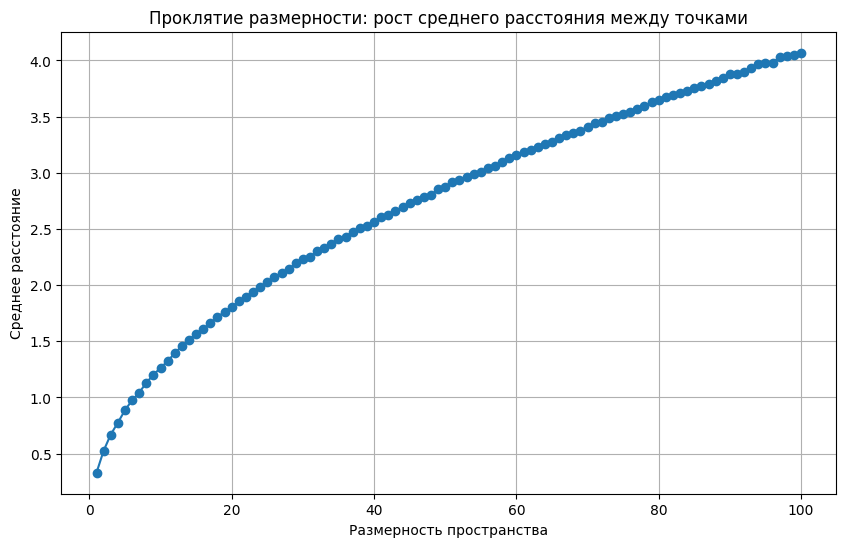

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для генерации случайных точек и вычисления среднего расстояния между ними
def calculate_mean_distance(dimension, num_points=1000):
    points = np.random.rand(num_points, dimension)
    distances = np.sqrt(np.sum((points[:, np.newaxis, :] - points[np.newaxis, :, :])**2, axis=2))
    mean_distance = np.mean(distances[np.triu_indices(num_points, k=1)])
    return mean_distance

# Массив для хранения средних расстояний
dimensions = range(1, 101)
mean_distances = [calculate_mean_distance(dim) for dim in dimensions]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dimensions, mean_distances, marker='o')
plt.title('Проклятие размерности: рост среднего расстояния между точками')
plt.xlabel('Размерность пространства')
plt.ylabel('Среднее расстояние')
plt.grid(True)
plt.show()


### Потребление больших вычислительных ресурсов

Большая размерность означает большой объем данных, который, в свою очередь, требует большого количества вычислительных операций и используемой памяти. Даже имея самый производительный компьютер в мире вы можете столкнуться с нехваткой памяти и долгими вычислениями, сравнимыми с бесконечностью.

### Сложность в интерпретируемости

Иногда решение ИИ нужно как-то объяснить и обосновать. В частности, это можно сделать, объяснив на основе каких данных модель дала свой ответ. При большом количестве признаков зачастую сложно объяснить смысл того или иного признака.

### Шум в данных

Мы уже ранее ознакомились с тем, к чему приводит содержание шума в данных. Оказывается, что не только все наблюдения, но и не все признаки в данных одинаково полезны. Некоторые из них могут быть шумовыми (т.е. содержать случайную или нерелевантную информацию), что может ухудшать качество модели. При наличии большого количества признаков модель может подстроиться под случайные шумовые зависимости, присутствующие в обучающем наборе данных.

### Невозможность визуализации данных

Для того, чтобы эффективно работать с данными и находить определенные закономерности в них, необходимо на них взглянуть. К сожалению, человечество ещё не научилось визулизировать пространства с более чем 3 размерностями, поэтому посмотреть на данные с более чем 3 признаками мы не можем.

## Методы снижения размерности данных

### Типы методов снижения размерности

Существует несколько методов снижения размерности, которые можно разделить на две основные категории: методы **выбора признаков** и **методы преобразования признаков**

**Методы выбора признаков**

Эти методы не изменяют сами признаки, а просто выбирают наиболее значимые из них. Вот некоторые методы выбора признаков:

1. *Отбор на основе важности признаков (Feature Importance)*

    Важность признаков может быть определена с помощью моделей, таких как случайные леса (Random Forests) или градиентный бустинг.

2. *SelectKBest*

    Этот метод выбирает определённое количество лучших признаков на основе статистических тестов

3. *L1-регуляризация*

    Исключение некоторых признаков при обучении модели машинного обучения

**Методы преобразования признаков**

Эти методы преобразуют исходные признаки в новый набор признаков с меньшим размером, которые, как правило, являются комбинацией исходных.

Вот некоторые подобные методы:

1. Анализ главных компонентов (PCA)

    Один из самых популярных методов, который снижает размерность, создавая новый набор ортогональных признаков (главные компоненты), которые объясняют максимальную возможную дисперсию данных.

2. t-SNE (t-distributed Stochastic Neighbor Embedding)

    Это нелинейный метод снижения размерности, который часто используется для визуализации многомерных данных в 2D или 3D пространстве. t-SNE пытается сохранить локальную структуру данных.

3. UMAP (Uniform Manifold Approximation and Projection)

    Этот метод, как и t-SNE, используется для нелинейного снижения размерности и визуализации, но он более производителен и может лучше сохранять глобальную структуру данных.


На этом занятии мы рассмотрим более подробно именно алгоритм PCA, так как остальные алгортимы являются более продвинутыми. Но если вам интересно, вы можете почитать о них отдельно.

### PCA (Principal Component Analysis)

Анализ главных компонент (PCA, Principal Component Analysis) — это метод снижения размерности, который используется для уменьшения количества признаков в наборе данных, сохраняя при этом как можно больше вариации (разнообразия) в данных. PCA преобразует исходные признаки в новый набор ортогональных признаков (главные компоненты), которые являются линейными комбинациями исходных переменных. Эти новые признаки упорядочиваются по убыванию дисперсии, что позволяет сосредоточиться на тех признаках, которые содержат наибольшую информацию.

Этот алгоритм уже реализован в библиотеке [sklearn](https://scikit-learn.org/), поэтому запоминать алгоритм вам не нужно. Вы можете сразу использовать PCA из sklearn. Но для того, чтобы составить представление как он работает мы можем рассмотреть его более подробно по шагам.

**Алгоритм PCA**

1. *Стандартизация признаков*
   - Сначала нам нужно убедиться, что все признаки имеют одинаковый масштаб и вклад в анализ.
   - Для каждого признака данных (столбца матрицы данных) вычитается среднее значение признака, и результат делится на стандартное отклонение признака. Это приведет признаки к единому масштабу, что особенно важно, если признаки измеряются в разных единицах.
   - Пусть $X$ — матрица данных, где строки — это наблюдения, а столбцы — признаки. Тогда стандартизированный признак вычисляется как:
   $$ X_{\text{стандартизированный}} = \frac{X - \mu}{\sigma} $$
   где $\mu$ — среднее значение признака, $\sigma$ — стандартное отклонение.

2. *Вычисление ковариационной матрицы*
   - Теперь нам нужно определить линейные зависимости между признаками.
   - Вычисляем ковариационную матрицу для стандартизированных данных. Ковариационная матрица показывает, как изменяются признаки друг относительно друга.
   - Ковариационная матрица $C$ вычисляется как:
   $$ C = \frac{1}{n-1} X_{\text{стандартизированный}}^T X_{\text{стандартизированный}} $$
   где $n$ — количество наблюдений.

3. *Вычисление собственных значений и собственных векторов ковариационной матрицы*
   - Теперь мы можем найти направления, по которым данные имеют наибольшую дисперсию (разнообразие).
   - Для этого мы находим так называемые **собственные векторы** и **собственные значения** матрицы ковариации, которые как раз нам покажут направления, по которым данные имеют наибольшую дисперсию.
   - Вдаваться в подробности вычисления их мы пока не будем, но если вам интересно, то можете почитать об этом [здесь](http://mathprofi.ru/sobstvennye_znachenija_i_sobstvennye_vektory.html).

4. *Сортировка собственных значений и выбор главных компонент*
   - Теперь мы ищем те компоненты, которые объясняют наибольшую долю дисперсии.
   - Сортируем собственные значения по убыванию и выбираем соответствующие им собственные векторы. Эти векторы будут главными компонентами.
   - Решаем, сколько главных компонент оставить (например, 2 компоненты). Но в целом, это зависит от задачи и данных.

5. *Формирование новых признаков:*
   - Теперь нам нужно преобразовать данные в новое пространство с меньшей размерностью.
   - Умножаем исходные стандартизированные данные на матрицу выбранных собственных векторов. В результате получаем новую матрицу данных, где строки — это наблюдения, а столбцы — главные компоненты.
   - Формула:
   $$ X_{\text{новое}} = X_{\text{стандартизированный}} W $$
   где $W$ — матрица собственных векторов, соответствующих выбранным главным компонентам.

В результате выполнения этого алгоритма мы получим данные, в которых будет меньшая размерность, чем была изначально.

**Визуализация алгоритма PCA**

Суть алгоритма PCA можно показать на этом графике:

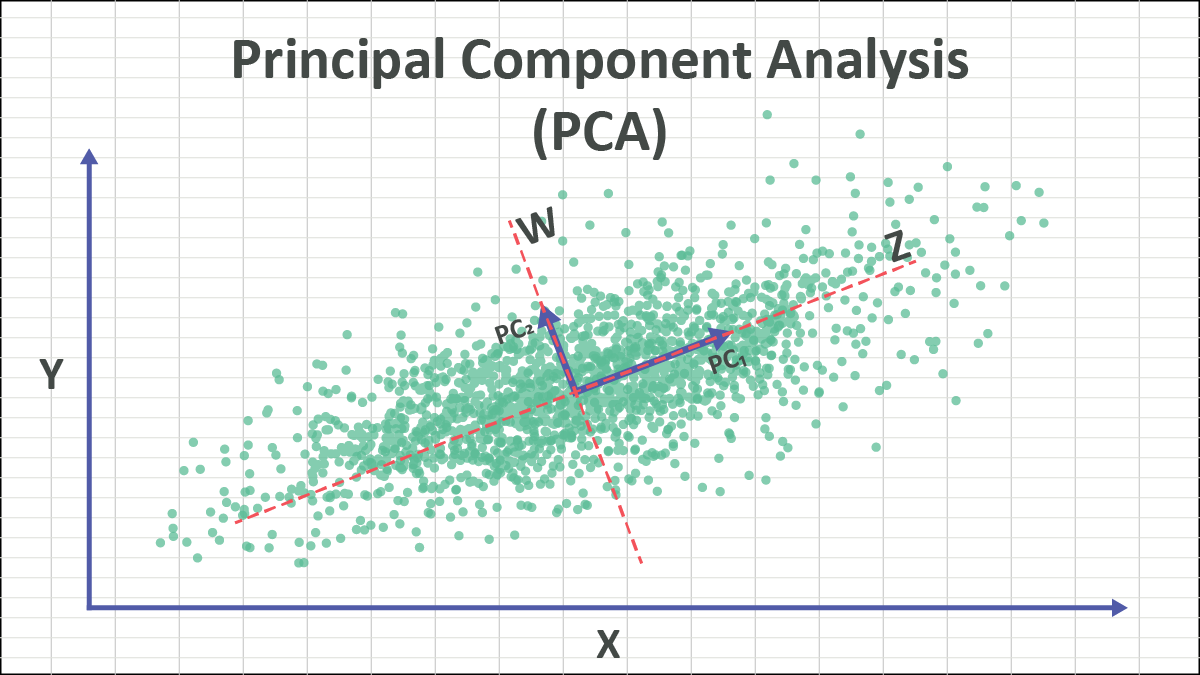

* Изначально данные находятся в координатах $X$ и $Y$, а значит данные изначально имеют размерность 2 (две координаты)
* PCA строит новые ортогональные (перпендикулярные) оси координат, которые называются *главные компоненты*, в направлении которые точки имеют наибольший разброс (дисперсию)
* В итоге, если мы хотим сократить размерность данных с двух до одного, то мы выберем одну главную компоненту, то есть одну из новых осей, где разброс данных будет максимальный. В данном случае, максимальный разброс данных будет по оси $Z$
* Координаты точек относительно оси $Z$ и будут теми данными с сокращенной размерностью, которые мы и хотели
* В результате, мы получили данные с размерностью 1

**Пример использования PCA**

Давайте попробуем применить алгоритм PCA на данных цветков Ирисов

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка набора данных "Ирисы"
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("Размерность данных:", X.shape)
print("Первые несколько строчек датасета:")
print(X[:5])

Размерность данных: (150, 4)
Первые несколько строчек датасета:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Датасет содержит 150 наблюдений и 4 признака. Давайте сократим количество признаков с четырех до двух:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Создаем объект PCA для уменьшения размерности с 4 до 2
pca = PCA(n_components=2)

# Применяем алгоритм на датасете и сохраняем преобразованные данные в X_r
X_r = pca.fit_transform(X)

print("Размерность данных:", X_r.shape)
print("Первые несколько строчек датасета:")
print(X_r[:5])

Размерность данных: (150, 2)
Первые несколько строчек датасета:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


Как вы можете видеть, количество признаков сократилось до двух. Теперь, мы можем визуализировать данные на плоскости:

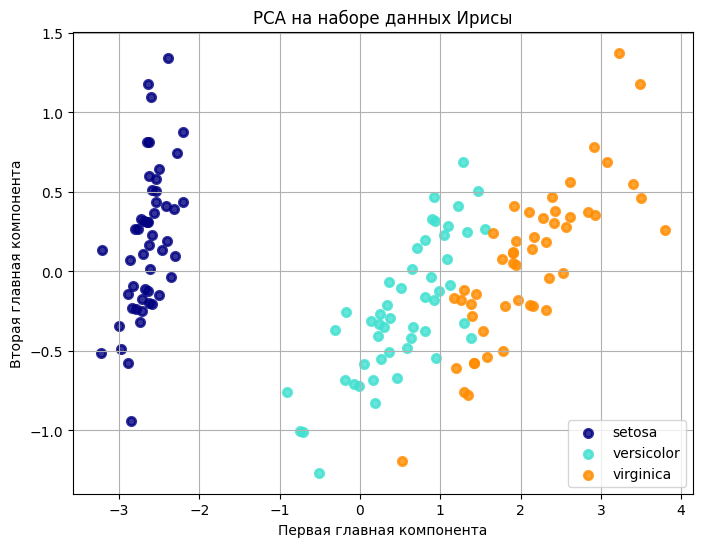

In [ ]:
# Визуализация данных после применения PCA
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA на наборе данных Ирисы')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.show()

## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Давайте снизим размерность данные датасета Penguins и визуализируем его. Для начала загрузим данные:

In [ ]:
import seaborn as sns

# Загрузка датасета "Пингвины"
penguins = sns.load_dataset("penguins").dropna()

# Выделяем признаки (длина клюва, глубина клюва, длина крыла и масса тела)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']  # Метки классов (виды пингвинов)

X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


Затем снизим размерность данных с помощью PCA

In [ ]:
# импортируем pandas
import pandas as pd

# импортируем PCA
...

# Применение PCA для уменьшения размерности до 2 компонент
pca = ...
X_pca = ...

# Создание DataFrame для визуализации
penguins_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'species': y
})
penguins_pca

,PC1,PC2,species
0,-457.325073,13.351587,Adelie
1,-407.252205,9.179113,Adelie
2,-957.044676,-8.160444,Adelie
4,-757.115802,-1.867653,Adelie
5,-557.177302,3.389158,Adelie
...,...,...,...
338,718.068699,-2.338199,Gentoo
340,643.090909,-4.280699,Gentoo
341,1543.098355,2.232010,Gentoo
342,992.994900,4.605154,Gentoo


Визуализируем данные

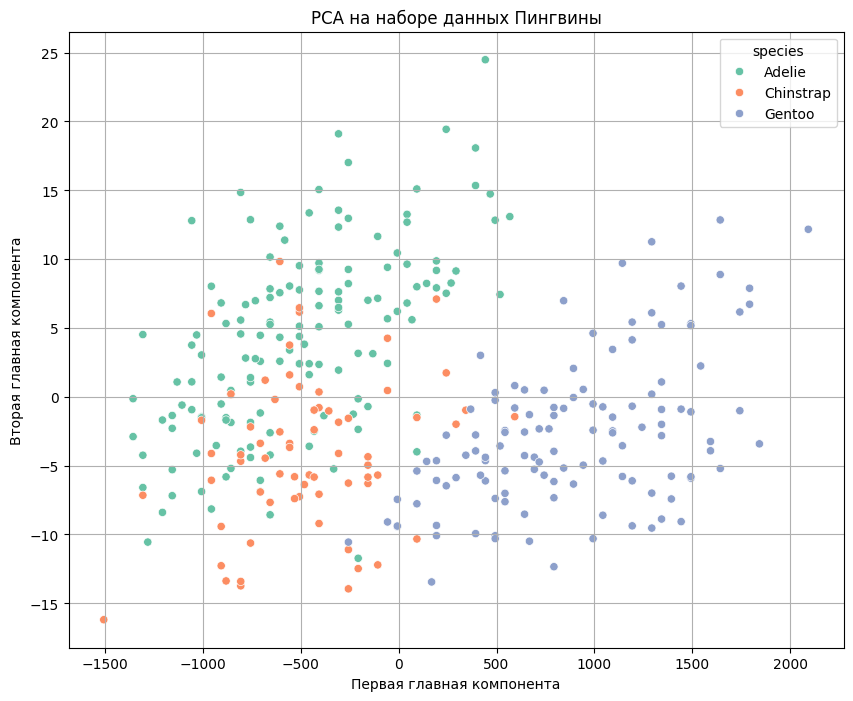

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных после PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=penguins_pca, palette='Set2')
plt.title('PCA на наборе данных Пингвины')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.show()

## Заключение

На этом занятии мы изучили, что такое снижение размерности данных и почему оно важно в задачах машинного обучения и анализа данных. Мы обсудили основные проблемы, возникающие при работе с данными высокой размерности, такие как "проклятие размерности", потребление больших вычислительных ресурсов, сложности в интерпретируемости, шум в данных, и невозможность визуализации многомерных данных.

Мы также познакомились с основными методами снижения размерности, такими как методы выбора признаков и методы преобразования признаков. В частности, мы подробно рассмотрели алгоритм PCA (Principal Component Analysis), который позволяет сократить количество признаков в наборе данных, сохраняя при этом как можно больше информации.

Мы смогли на практике применить PCA к различным наборам данных и увидели, как этот метод позволяет визуализировать многомерные данные на плоскости, что значительно облегчает их анализ и интерпретацию.

В заключение, снижение размерности данных является важным инструментом в арсенале специалистов по анализу данных и машинному обучению. Оно помогает не только ускорить вычисления и улучшить работу моделей, но и делает данные более интерпретируемыми и доступными для анализа.